In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Derive Data

In [2]:
# read data into memory
data_set = np.genfromtxt("hw05_data_set.csv", delimiter = ",")

# put first 100 points into training arrays and rest of the 33 points to test arrays
train = np.array(data_set[1:101])
x_train = np.array([p[0] for p in train])
y_train = np.array([p[1] for p in train])

test = np.array(data_set[101:134])
x_test = np.array([p[0] for p in test])
y_test = np.array([p[1] for p in test])

# For data interval in plotting
minval=0
maxval=60

## Learning Algorithm

## Prediction algorithm

In [3]:
def tree(x_train,y_train,P):
    # create necessary data structures
    node_indices = {}
    is_terminal = {}
    need_split = {}
    node_means = {}
    node_splits = {}

    # put all training instances into the root node
    node_indices[1] = np.array(range(len(x_train)))
    is_terminal[1] = False
    need_split[1] = True
    
    while 1:
        
        # find nodes that need splitting
        split_nodes = [key for key, value in need_split.items() if value == True]
        if len(split_nodes) == 0:
            break
            
        # find best split positions for all nodes
        for split_node in split_nodes:
            data_indices = node_indices[split_node]
            need_split[split_node] = False
            node_mean = np.mean(y_train[data_indices])
            
            #Pruning
            if x_train[data_indices].size <=P:
                is_terminal[split_node] = True
                node_means[split_node] = node_mean
                
            else:
                is_terminal[split_node] = False
                x_sorted = np.sort(np.unique(x_train[data_indices]))
                split_positions = (x_sorted[1:len(x_sorted)] +x_sorted[0:(len(x_sorted)-1)])/2
                split_scores = np.repeat(0.0,len(split_positions))
                
                for s in range(len(split_positions)):
                    left_indices = data_indices[x_train[data_indices] < split_positions[s]]
                    right_indices = data_indices[x_train[data_indices] >= split_positions[s]]
                    total_err = 0
                    if len(left_indices)>0:
                        total_err += np.sum((y_train[left_indices] - np.mean(y_train[left_indices])) ** 2)
                    if len(right_indices)>0:
                        total_err += np.sum((y_train[right_indices] - np.mean(y_train[right_indices])) ** 2)
                    split_scores[s] = total_err/(len(left_indices)+len(right_indices))
                    
                #if len 1 is when we take unique values
                if len(x_sorted) == 1 :
                    is_terminal[split_node] = True
                    node_means[split_node] = node_mean
                    continue
                best_split = split_positions[np.argmin(split_scores)]
                node_splits[split_node] = best_split
                
                # create left node using the selected split
                left_indices = data_indices[(x_train[data_indices] < best_split)]
                node_indices[2 * split_node] =left_indices
                is_terminal[2 * split_node]  = False
                need_split[2 * split_node] = True

                # create right node using the selected split
                right_indices = data_indices[(x_train[data_indices] >= best_split)]
                node_indices[2 * split_node + 1] = right_indices
                is_terminal[2 * split_node + 1] = False
                need_split[2 * split_node + 1]  =True
    return node_splits,node_means,is_terminal

## Prediction Definition

In [4]:
def predict(x, node_splits, node_means, is_terminal):
    index = 1 #start from root
    while 1:
        if is_terminal[index] == True:
            return node_means[index]
        if x > node_splits[index]:
            index = index*2 + 1 #right child
        else:
            index = index*2 #left child

## Plotting

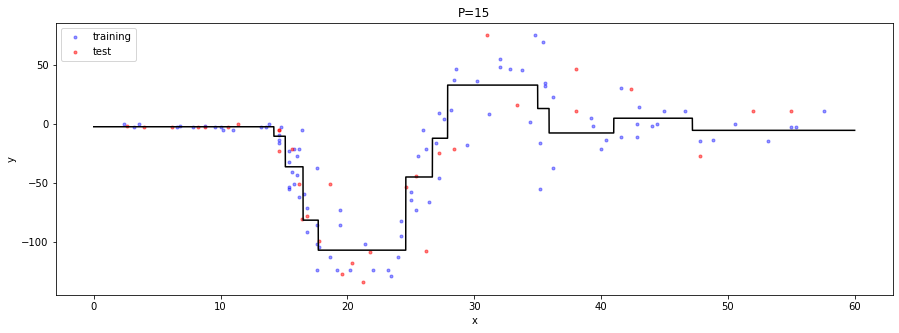

In [5]:
P=15
node_splits,node_means,is_terminal = tree(x_train,y_train,P)
pred = [predict(x,node_splits,node_means,is_terminal) for x in x_test]
pred= np.array(pred)
data_interval = np.arange(minval,maxval,0.001)
fig = plt.figure(figsize=(15,5))
plt.plot(x_train,y_train,"b.", alpha = 0.4, label="training")
plt.plot(x_test,y_test,"r.", alpha = 0.5, label="test")
int_plot=[]
for i in range(len(data_interval)):
    int_plot.append(predict(data_interval[i],node_splits,node_means,is_terminal))
plt.plot(data_interval,int_plot,color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("P=15")
plt.legend(loc="upper left")
plt.show()

## Root Mean Squared Error

In [6]:
def rmse(y_test,pred):
    return np.sqrt(sum((y_test - pred) ** 2) / len(y_test))

#calculate and print RMSE
print("RMSE is",rmse(y_test,pred),"when P is",  P)

RMSE is 26.87765508724891 when P is 15


## Repeat for other P values and print RMSES

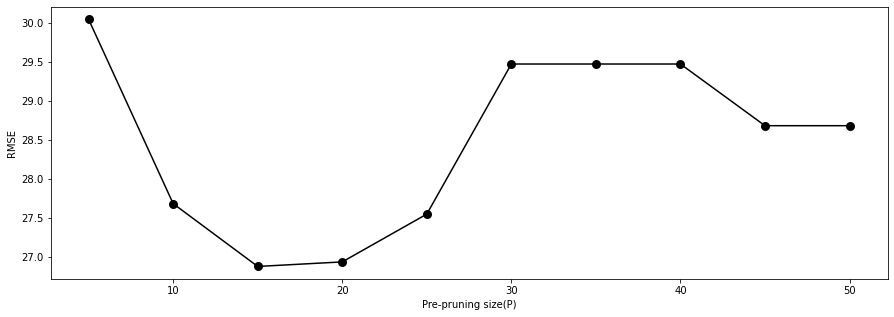

In [7]:
rmse_values = []
for P in range(5,55,5):
    node_splits,node_means,is_terminal = tree(x_train,y_train,P)
    pred = np.array([predict(x,node_splits,node_means,is_terminal) for x in x_test])
    rmse_values.append(rmse(y_test,pred))
rmses = np.array(rmse_values)
fig = plt.figure(figsize=(15,5))
plt.plot(range(5,55,5),rmse_values,color= "black")
plt.scatter(range(5,55,5),rmse_values,color= "black",linewidths=3) 
plt.xlabel("Pre-pruning size(P)")
plt.ylabel("RMSE")
plt.show()